<a href="https://colab.research.google.com/github/silverstar0727/study-/blob/master/opencv_tutorial_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tracker
값을 편하게 바꾸어주는 역할을 함

cv2.createTrackbar(track_bar_name, window_name, value, count, on_change)
* value: 초기 값
* count: Max값(Min:0)
* on_change: 값이 변경될 때 호출되는 Callback 함수


### pycharm에서 실습을 진행해야 함

In [ ]:
import cv2
import numpy as np

def change_color(x):
  r = cv2.getTrackbarPos("R", "Image")
  g = cv2.getTrackbarPos("G", "Image")
  b = cv2.getTrackbarPos("B", "Image")
  image[:] = [b, g, r]
  cv2.imshow('Image', image)
  
# 600x400 이미지 변경
image = np.zeros((600, 400, 3), np.uint8)
cv2.namedWindow("Image")

# R G B의 트랙바 만들기(change_color함수를 이용)
cv2.createTrackbar("R", "Image", 0, 255, change_color)
cv2.createTrackbar("G", "Image", 0, 255, change_color)
cv2.createTrackbar("B", "Image", 0, 255, change_color)

cv2.imshow('Image', image)
cv2.waitKey(0)

## 도형그리기
#### 직선그리기
cv.line(image, start, end, color, thickness)
* start: 시작좌표(2차원)
* end: 종료좌표(2차원)
* thickness: 선의두께

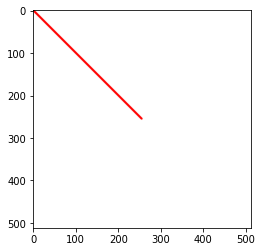

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8) # 8 bit를 이용해서 최대 255를 가지는 512x512의 윈도우 만들기
image = cv2.line(image, (0, 0), (255, 255), (255, 0, 0), 3) # (0,0)부터 (255, 255)가지 직선을 그리기 
# 두께는 3이고, 색은 255, 0, 0

plt.imshow(image)
plt.show()

## 사각형 그리기
cv.rectangle(image, start, end, color, thickness)
* start: 시작
* end: 종료좌표
* thickness: 두께(-1일 경우 내부를 가득 채움)

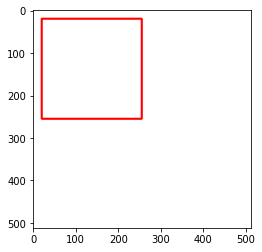

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.rectangle(image, (20, 20), (255, 255), (255, 0, 0), 3)

plt.imshow(image)
plt.show()

## 원 그리기
cv.circle(image, center, radian, color, thickness)
* thickness: -1일 경우 내부를 채움


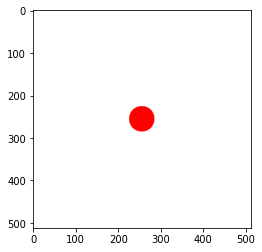

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.circle(image, (255, 255), 30, (255, 0, 0), -1)

plt.imshow(image)
plt.show()

## 다각형 그리기
cv2.polynomial(image, points, is_colored, color, thickness)
* points: 꼭지점들
* is_closed: 닫힘 여부(Boolean)
* thickness: 두께(-1일 때는 내부를 채우기)

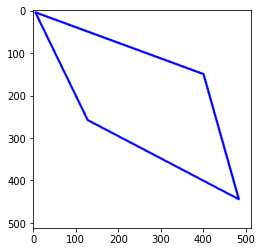

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[5, 5], [128, 258], [483, 444], [400, 150]]) # 4개의 점을 2차원 넘파이 객체로 저장
image = cv2.polylines(image, [points], True, (0, 0, 255), 4)

plt.imshow(image)
plt.show()

## 문자열 그리기
cv2.putText(image, text, position, font_type, font_scale, color)
* position: 텍스트가 출력될 위치
* font_type: 글씨체
* font_scale: 글치 크기 가중치

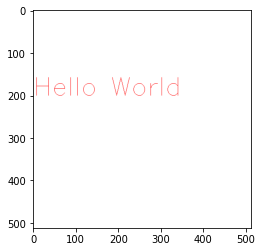

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# hello world를 그리기, italic체를 사용
image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.putText(image, 'Hello World', (0, 200), cv2.FONT_ITALIC, 2, (255, 0, 0))

plt.imshow(image)
plt.show()

## Contours 
### Contours 찾기
cv2.findContours(image, mode, method): 이미지에서 contours를 찾는 함수
* mode: Contour들을 찾는 방법
 * RETR_EXTERNAL: 바깥쪽 line만 찾기
 * RETR_LIST: 모든 line을 찾지만, Hierarchy구성x
 * RETR_TREE: 모든 line을 찾으며, 모든 Hierarchy 구성
* method: Contour들을 찾는 근사치 방법
 * CHAIN_APPROX_NONE: 모든 Contour들의 포인트를 저장
 * CHAIN_APPROX_SIMPLE: Contour line을 그릴 수 있는 포인트만 저장

>입력 이미지는 Gray Scale Threshold의 전처리 과정치 필요함


cv2.drawContours(image, contours, contour_index, color, thickness): Contour들을 그리는 함수
 * contour_index: 그리고자 하는 Contour Line(전체: -1)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digit_image.png to digit_image.png


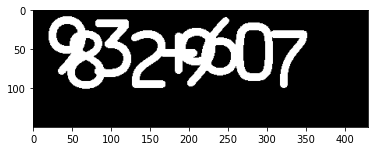

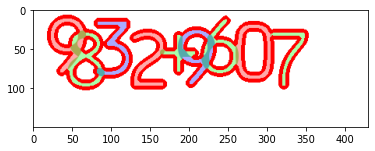

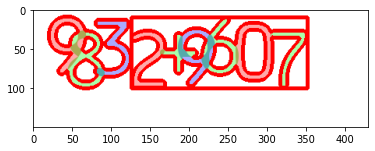

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0) # 230 보다 큰경우 255로 아니면 0으로
thresh = cv2.bitwise_not(thresh) # 하얀색과 검은색의 반전

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0] # 모든 contour를 찾음
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4) # 빨간색으로 contour를 그림

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
x, y, w, h = cv2.boundingRect(contour) # 사각형에 대한 정보
image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3) # 위 코드의 사각형을 그리기

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Convex Hull
cv2.convexHull(contour): convex hull알고리즘으로 대략적인 형태의 contour외곽을 빠르게 구함

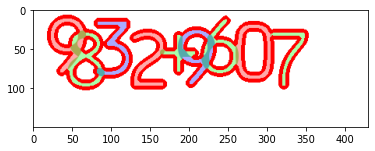

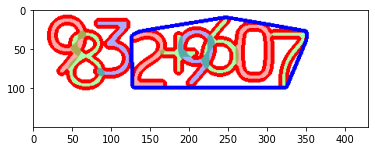

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## contour의 유사다각형 구하기
cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구함
* curve: Contour
* epsilon: 최대거리(클수록 point개수가 감소)
* closed: 폐곡선 여부

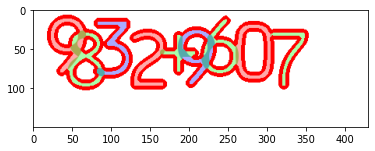

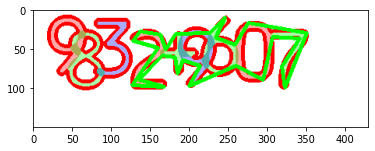

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

contour = contours[0]
epsilon = 0.01 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)
image = cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### contour의 기본정보
cv2,contourArea(contour): 면적

cv2.arcLength(contour): 둘레구하기

cv2.moments(contour): 특징 추출

9637.5
1112.1046812534332
{'m00': 9637.5, 'm10': 2328654.1666666665, 'm01': 525860.6666666666, 'm20': 592439950.25, 'm11': 125395340.54166666, 'm02': 32616659.75, 'm30': 157199366984.05002, 'm21': 31597487112.5, 'm12': 7677332730.433333, 'm03': 2223038890.5, 'mu20': 29780523.227014065, 'mu11': -1665373.5978347063, 'mu02': 3923591.96819859, 'mu30': -339915780.7390442, 'mu21': 76375946.41720533, 'mu12': -21905836.49518633, 'mu03': 15169233.760740757, 'nu20': 0.3206295471760697, 'nu11': -0.01793010748946005, 'nu02': 0.04224302932750429, 'nu30': -0.03727866486560947, 'nu21': 0.008376172780476334, 'nu12': -0.0024024196097321344, 'nu03': 0.001663614382378067}


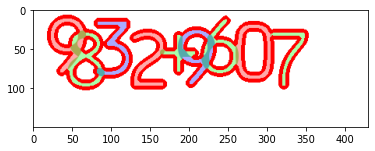

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('digit_image.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(image_gray, 230, 255, 0)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 4)

contour = contours[0]
area = cv2.contourArea(contour)
print(area)

length = cv2.arcLength(contour, True)
print(length)

M = cv2.moments(contour)
print(M)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()